In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

### Problem 1
Let the points $x_1 = (1, 2), x_2 = (3, 2), x_3 = (2, 1)$ and $x_4 = (3, 3)$, where $x_1$ and $x_3$ are
labeled -1 and $𝑥_2$ and $x_4$ are labeled +1. Calculate the appropriate weights manually
using the perceptron algorithm with $\eta$ = 1. (Hint: The algorithm should update the
weights nine times).

In [ ]:
#import numpy as np
def h(w, x, b):    
    return np.sign(np.dot(x, w)+b)

def check_converge(X, y, w, b):    
    return np.array_equal(h(w, X, b), y)

def perceptron(X, y, w, b, eta = 1):
    #eta = 1 # learning rate
    t = 0 # number of mistake
    norms = []
    lst_wb = []
    for i in range(len(X)):
        norms.append(np.linalg.norm(X[i]))
    R2 = (max(norms))**2
    while True:
        for i in range(len(X)):
            if h(w, X[i], b) != y[i]:
                w_new = w + eta*y[i]*X[i]  #using w_new, b_new to avoid the the effect of pointer on list.append method
                b_new = b + eta*y[i]*R2
                t += 1 #counting mistakes
                lst_wb.append([w_new,b_new])
                w, b = w_new, b_new
                #print(lst_wb, t)
        if check_converge(X, y, w, b):
            break
    return (lst_wb, w, b, t)



In [ ]:
X = np.array([[1, 2], [3, 2], [2, 1], [3, 3]]) 
y = np.array([-1, 1, -1, 1])

#w = np.array([0, 0]) # weights # this works also
w = np.zeros((2,)) # feeding the size (2,1) does not work!
b = 0 # bias
(lst_wb, w, b, t) = perceptron(X, y, w, b, eta = 1)

In [ ]:
lst_wb

[[array([-1., -2.]), -17.999999999999996],
 [array([2., 0.]), 0.0],
 [array([ 0., -1.]), -17.999999999999996],
 [array([3., 2.]), 0.0],
 [array([2., 0.]), -17.999999999999996],
 [array([5., 2.]), 0.0],
 [array([3., 1.]), -17.999999999999996],
 [array([6., 4.]), 0.0],
 [array([5., 2.]), -17.999999999999996]]

In [ ]:
t

9

#### Problem 3
Simulate data for two classes in a 2D feature space, classes should be linearly separable.
Generate data in such a way, that there is a gap between the two classes. You can also
use the “make_blobs” function from the sklearn.datasets module.

In [ ]:
#center_box: The bounding box for each cluster center when centers are generated at random. If this (min,max) is large,
# the clusters tend to be far from each other
X, y = make_blobs(n_samples=20, centers=2, n_features=2, center_box=(-100.0, 100.0), random_state=0)

In [ ]:
X

array([[10.62713698, 42.29570825],
       [19.50412225,  7.55661866],
       [10.07576849, 42.18377754],
       [10.7127892 , 42.88651607],
       [11.63025878, 42.06059539],
       [10.20656402, 43.3715476 ],
       [ 9.65948193, 43.44847178],
       [20.70762264,  9.35479912],
       [22.82242984,  7.52227092],
       [ 7.20971097, 43.69149187],
       [20.59843373,  8.78945275],
       [19.66488947,  6.99584013],
       [22.08545443, 10.44599537],
       [ 9.90674436, 44.49214678],
       [20.1653484 ,  8.67433385],
       [21.7829659 , 10.17901645],
       [20.20476307,  9.13298557],
       [18.84640502, 10.92741199],
       [11.25677986, 42.83271501],
       [10.52373851, 43.15954829]])

In [ ]:
y

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0])

In [ ]:
for i in range(len(y)):
    if y[i]==0:
        y[i]= -1

In [ ]:
pos=[]
neg=[]
for i in range(len(y)):
    if y[i]==1:
        pos.append(i)
    else:
        neg.append(i)

In [ ]:
X_neg=X[neg]
X_pos=X[pos]

Text(0.5, 1.0, 'Generating data using make_blobs with margin 100')

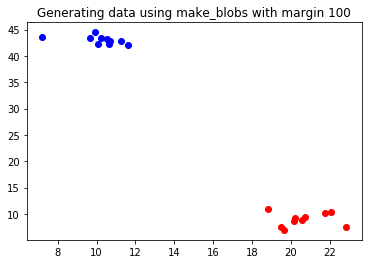

In [ ]:
plt.scatter(X_neg[:,0], X_neg[:,1], c= "blue")
plt.scatter(X_pos[:,0], X_pos[:,1], c= "red")
plt.title('Generating data using make_blobs with margin 100')


### Problem 4
Implement the perceptron algorithm and run the perceptron algorithm on your
simulated data with an $\eta$ of your choice.

In [ ]:
w = np.zeros((2,)) # feeding the size (2,1) does not work!
b = 0 # bias
(lst_wb, w, b, t)= perceptron(X, y, w, b, eta = 0.1)

In [ ]:
t

7

In [ ]:
X

array([[10.62713698, 42.29570825],
       [19.50412225,  7.55661866],
       [10.07576849, 42.18377754],
       [10.7127892 , 42.88651607],
       [11.63025878, 42.06059539],
       [10.20656402, 43.3715476 ],
       [ 9.65948193, 43.44847178],
       [20.70762264,  9.35479912],
       [22.82242984,  7.52227092],
       [ 7.20971097, 43.69149187],
       [20.59843373,  8.78945275],
       [19.66488947,  6.99584013],
       [22.08545443, 10.44599537],
       [ 9.90674436, 44.49214678],
       [20.1653484 ,  8.67433385],
       [21.7829659 , 10.17901645],
       [20.20476307,  9.13298557],
       [18.84640502, 10.92741199],
       [11.25677986, 42.83271501],
       [10.52373851, 43.15954829]])

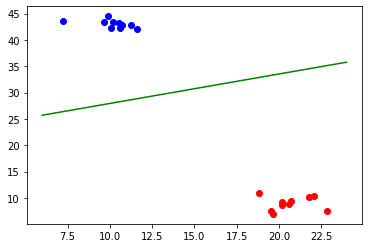

In [ ]:
plt.scatter(X_neg[:,0], X_neg[:,1], c= "blue")
plt.scatter(X_pos[:,0], X_pos[:,1], c= "red")
# plotting the line
a = -w[0]/w[1]
m = -b/w[1]
x = np.linspace(6,24)
y = a*x+m
plt.plot(x,y,'g')

### Problem 5
Study the number of mistakes made by the algorithm in a systematical manner (e.g.
vary the number of examples, the size of the maximal margin) with an $\eta$ of your choice.
What do you see?

#### 5.1 varying range of margin

In [ ]:
#center_box: The bounding box for each cluster center when centers are generated at random. If this (min,max) is large,
# the clusters tend to be far from each other
X, y = make_blobs(n_samples=20, centers=2, n_features=2, center_box=(-10.0, 10.0), random_state=0)

In [ ]:
for i in range(len(y)):
    if y[i]==0:
        y[i]= -1

In [ ]:
pos=[]
neg=[]
for i in range(len(y)):
    if y[i]==1:
        pos.append(i)
    else:
        neg.append(i)
X_neg=X[neg]
X_pos=X[pos]

Text(0.5, 1.0, 'Generating data using make_blobs with margin 10')

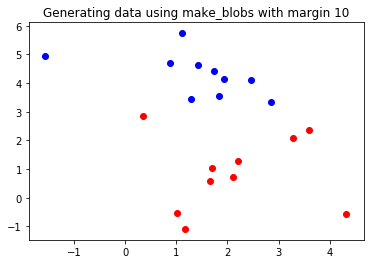

In [ ]:
plt.scatter(X_neg[:,0], X_neg[:,1], c= "blue")
plt.scatter(X_pos[:,0], X_pos[:,1], c= "red")
plt.title('Generating data using make_blobs with margin 10')

In [ ]:
#using R^2 in updating b
w = np.zeros((2,)) # feeding the size (2,1) does not work!
b = 0 # bias
(lst_wb, w, b, t)=perceptron(X, y, w, b, eta = 0.1)

In [ ]:
t

90

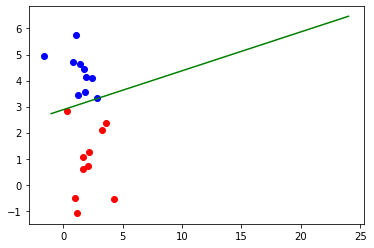

In [ ]:
plt.scatter(X_neg[:,0], X_neg[:,1], c= "blue")
plt.scatter(X_pos[:,0], X_pos[:,1], c= "red")
# plotting the line
a = -w[0]/w[1]
m = -b/w[1]
x = np.linspace(-1,24)
y = a*x+m
plt.plot(x,y,'g')

**conclusion:** Number of mistakes increases as range of margin narrows.

#### 5.2 varying the number of examples

In [ ]:
#center_box: The bounding box for each cluster center when centers are generated at random. If this (min,max) is large,
# the clusters tend to be far from each other
X, y = make_blobs(n_samples=10, centers=2, n_features=2, center_box=(-10.0, 10.0), random_state=0)

In [ ]:
for i in range(len(y)):
    if y[i]==0:
        y[i]= -1
pos=[]
neg=[]
for i in range(len(y)):
    if y[i]==1:
        pos.append(i)
    else:
        neg.append(i)
X_neg=X[neg]
X_pos=X[pos]

In [ ]:
w = np.zeros((2,)) # feeding the size (2,1) does not work!
b = 0 # bias
(lst_wb, w, b, t)=perceptron(X, y, w, b, eta = 0.1)

In [ ]:
t

9

In [ ]:
X, y = make_blobs(n_samples=40, centers=2, n_features=2, center_box=(-10.0, 10.0), random_state=0)

In [ ]:
for i in range(len(y)):
    if y[i]==0:
        y[i]= -1
pos=[]
neg=[]
for i in range(len(y)):
    if y[i]==1:
        pos.append(i)
    else:
        neg.append(i)
X_neg=X[neg]
X_pos=X[pos]

In [ ]:
w = np.zeros((2,)) # feeding the size (2,1) does not work!
b = 0 # bias
(lst_wb, w, b, t)=perceptron(X, y, w, b, eta = 0.1)

In [ ]:
t

15

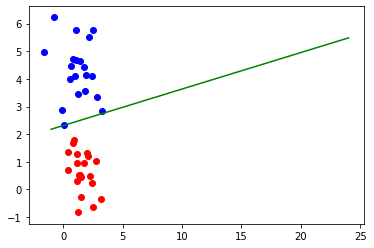

In [ ]:
plt.scatter(X_neg[:,0], X_neg[:,1], c= "blue")
plt.scatter(X_pos[:,0], X_pos[:,1], c= "red")
# plotting the line
a = -w[0]/w[1]
m = -b/w[1]
x = np.linspace(-1,24)
y = a*x+m
plt.plot(x,y,'g')

In [ ]:
#center_box: The bounding box for each cluster center when centers are generated at random. If this (min,max) is large,
# the clusters tend to be far from each other
X, y = make_blobs(n_samples=20, centers=2, n_features=2, center_box=(-10.0, 10.0), random_state = 4)

In [ ]:
for i in range(len(y)):
    if y[i]==0:
        y[i]= -1
pos=[]
neg=[]
for i in range(len(y)):
    if y[i]==1:
        pos.append(i)
    else:
        neg.append(i)
X_neg=X[neg]
X_pos=X[pos]

In [ ]:
w = np.zeros((2,)) # feeding the size (2,1) does not work!
b = 0 # bias
(lst_wb, w, b, t)=perceptron(X, y, w, b, eta = 0.1)

In [ ]:
t

5648

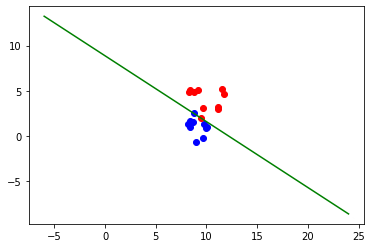

In [ ]:
plt.scatter(X_neg[:,0], X_neg[:,1], c= "blue")
plt.scatter(X_pos[:,0], X_pos[:,1], c= "red")
# plotting the line
a = -w[0]/w[1]
m = -b/w[1]
x = np.linspace(-6,24)
y = a*x+m
plt.plot(x,y,'g')

### Problem 6
Generate a plot of your data and all the boundary lines. You should plot the points
$𝑥_i$ and the boundary after each iteration of the inner loop.
(Hint: You need to solve the equation of the boundary line for one of the 𝑥 coordinates
first, in order to plot the boundary line)

In [ ]:
#center_box: The bounding box for each cluster center when centers are generated at random. If this (min,max) is large,
# the clusters tend to be far from each other
X, y = make_blobs(n_samples=10, centers=2, n_features=2, center_box=(-10.0, 10.0), random_state = 0)

In [ ]:
X

array([[ 1.12031365,  5.75806083],
       [-0.49772229,  1.55128226],
       [ 1.9263585 ,  4.15243012],
       [ 2.49913075,  1.23133799],
       [ 3.54934659,  0.6925054 ],
       [ 1.7373078 ,  4.42546234],
       [ 2.91970372,  0.15549864],
       [ 2.84382807,  3.32650945],
       [ 0.87305123,  4.71438583],
       [ 2.36833522,  0.04356792]])

In [ ]:
for i in range(len(y)):
    if y[i]==0:
        y[i]= -1
pos=[]
neg=[]
for i in range(len(y)):
    if y[i]==1:
        pos.append(i)
    else:
        neg.append(i)
X_neg=X[neg]
X_pos=X[pos]

In [ ]:
w = np.zeros((2,)) # feeding the size (2,1) does not work!
b = 0 # bias
(lst_wb, w, b, t)=perceptron(X, y, w, b, eta = 0.1)

In [ ]:
def plot_per(X_pos, X_neg, lst_wb):
    for i in range(len(lst_wb)):
        plt.scatter(X_neg[:,0], X_neg[:,1], c= "blue")
        plt.scatter(X_pos[:,0], X_pos[:,1], c= "red")
        w, b = lst_wb[i]
        a = -w[0]/w[1]
        m = -b/w[1]
        x = np.linspace(-1,6)
        y = a*x+m
        plt.plot(x,y,'g')
        plt.show()

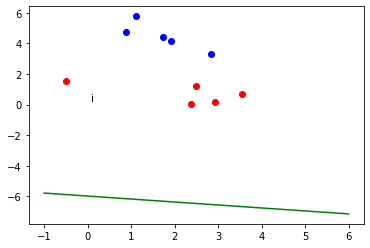

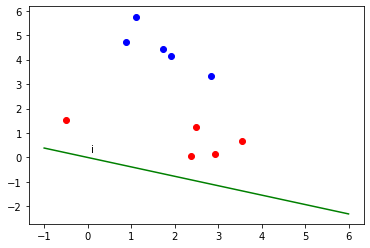

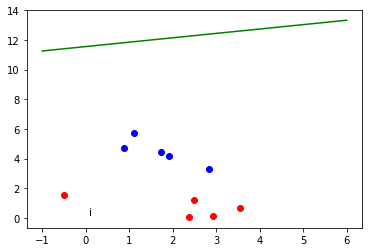

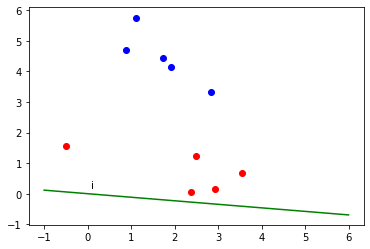

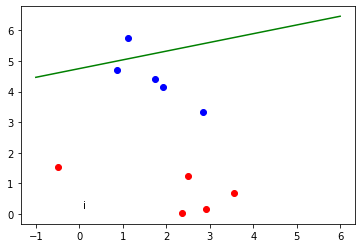

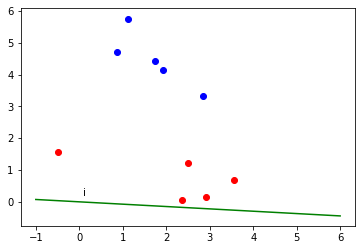

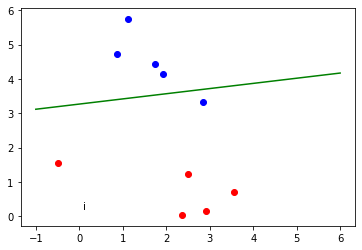

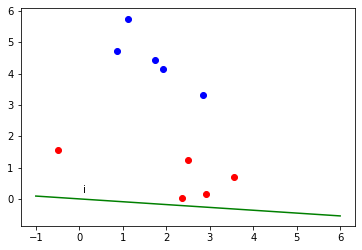

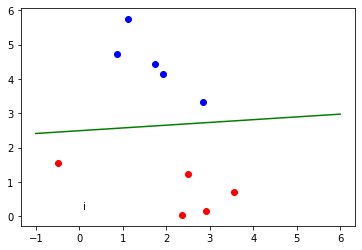

In [ ]:
plot_per(X_pos, X_neg, lst_wb)